In [159]:
import pandas as pd
import numpy as np
import seaborn as sns

In [160]:
df = pd.read_csv("medical_examination.csv", index_col="id")

In [161]:
df['overweight'] = round(df['weight'] / (df['height'] / 100) ** 2, 2)

In [162]:
df['overweight'] = [1 if x > 25 else 0 for x in df['overweight']]

In [163]:
df['overweight'] = df['overweight'].astype('int64')

In [164]:
df['cholesterol'] = [0 if x == 1 else 1 for x in df['cholesterol']]

In [165]:
df['gluc'] = [0 if x == 1 else 1 for x in df['gluc']]

In [166]:
df_melted = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [167]:
df_melted = pd.DataFrame(df_melted.groupby(['cardio', 'variable', 'value'])['value'].count())

In [ ]:
df_melted.rename(columns={'value':'total'}).reset_index()

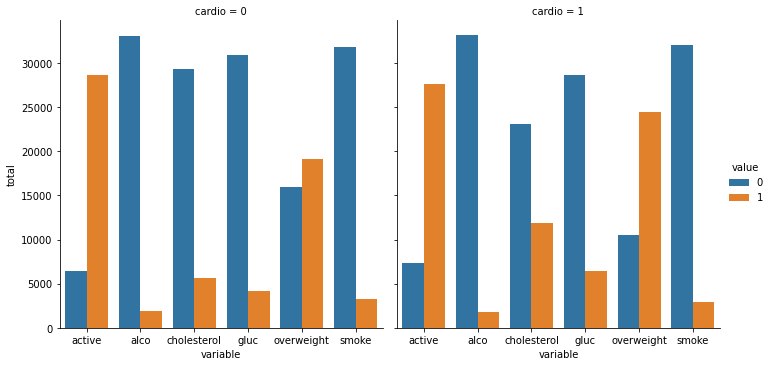

In [171]:
sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar')

In [172]:
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


In [173]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
                 & (df['height'] >= df['height'].quantile(0.025))
                 & (df['height'] <= df['height'].quantile(0.975))
                 & (df['weight'] >= df['weight'].quantile(0.025))
                 & (df['weight'] <= df['weight'].quantile(0.975))]

In [176]:
corr = df_heat.corr()

In [177]:
mask = np.zeros_like(corr)

In [178]:
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [179]:
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

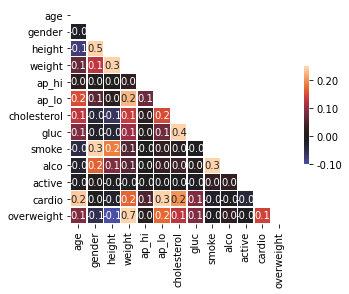

In [181]:
sns.heatmap(
        corr,
        linewidths=.5,
        annot=True,
        fmt='.1f',
        mask=mask,
        square=True,
        center=0,
        vmin=-0.1,
        vmax=0.25,
        cbar_kws={
            'shrink': .45,
            'format': '%.2f'
        })